In [33]:
import pandas as pd
import datetime
output = []
g_df = pd.read_csv("temp_out.csv")
s_df = pd.read_csv("temp_out2.csv")
print(g_df)
print(s_df)
g_rows = g_df.shape[0]
s_rows = s_df.shape[0]

for x in range(g_rows):
    g_lat = g_df.at[x,'Latitude']
    g_long = g_df.at[x,'Longitude']
    g_start = g_df.at[x,'StartTime']
    g_end = g_df.at[x,'EndTime']
    g_confidence = g_df.at[x,'Confidence']
    for y in range(s_rows):
        
        s_lat = s_df.at[y,'Latitude']
        s_long = s_df.at[y,'Longitude']
        s_start = s_df.at[y,'StartTime']
        s_end = s_df.at[y,'EndTime']
        s_confidence = s_df.at[y,'Confidence']
#         print(g_lat,s_lat)
        if((s_lat == g_lat) and (s_long == g_long) and (s_end >= g_start) and (g_end >= s_start)):
            
            temp = []
            temp.append(s_lat)
            temp.append(s_long)
            s = max(s_start,g_start)
            s = datetime.datetime.fromtimestamp(s / 1e3)
            e = min(s_end,g_end)
            e = datetime.datetime.fromtimestamp(e / 1e3)
            temp.append(str(s))
            temp.append(str(e))
            temp.append((s_confidence * g_confidence*1.0)/100)
            output.append(temp)
    
print(output)    

   ID  EntryNo   Latitude  Longitude      StartTime        EndTime  Confidence
0   1        1  26.504618  80.234085  1585899128216  1586079212033          45
1   1        2  26.512339  80.232900  1586079212033  1586112661889          43
2   1        3  26.504618  80.234085  1586112661889  1587192839028          58
3   1        4  26.479226  80.316044  1587193983171  1587201765567          59
4   1        5  26.505190  80.233854  1587203238549  1587222096045          39
5   1        6  26.504618  80.234085  1587222096045  1587448925750          42
6   1        7  26.505190  80.233854  1587448925750  1587464070774          68
7   1        8  26.504618  80.234085  1587464070774  1587547397074          50
8   1        9  26.512247  80.224899  1587548872724  1587551316629          50
9   1       10  26.504618  80.234085  1587552789926  1587638455988          49
    ID  EntryNo   Latitude  Longitude      StartTime        EndTime  \
0    1        1  26.512339  80.232900  1585715830908  158571

[26.512338800000002, 80.2329]
[26.512338800000002, 80.2329]
[26.5051896, 80.23385400000001]
[26.5051896, 80.23385400000001]
[26.5051896, 80.23385400000001]
[26.5051896, 80.23385400000001]
[26.479226300000004, 80.3160441]


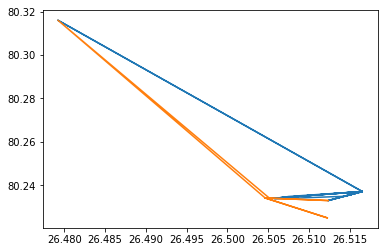

In [40]:
swa_long = s_df['Longitude'].tolist()
swa_lati = s_df['Latitude'].tolist()
guddu_long = g_df['Longitude'].tolist()
guddu_lati = g_df['Latitude'].tolist()

from matplotlib import pyplot as plt
plt.plot( swa_lati, swa_long)
plt.plot(guddu_lati,guddu_long)
intersect = []
for i in range(len(swa_long)):
    for j in range(len(guddu_long)):
        if((swa_long[i] == guddu_long[j]) and (swa_lati[i] == guddu_lati[j])):
            temp = []
            temp.append(swa_lati[i])
            temp.append(swa_long[i])
            
            intersect.append(temp)
        
            
for x in intersect:
    print(x) 
plt.show()
